# This notebook aims at describing the main data characteristics from the dataset of the launch data constituted by the Union of Concerned Scientists

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

#### Plotting libraries #####
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm


### Display all columns in a pandas dataset
pd.set_option('display.max_columns', None)

In [262]:
df = pd.read_csv('C:/Users/amaur/OneDrive/Documents/Data science/Space prediction project/dataset/launch_2000_2020.csv', sep=';')

# Plotting

In [263]:
# Create multi index
df.set_index(['Launcher_country', 'Date of Launch', 'Purpose_agg'], inplace = True)
#df.sort_index(inplace=True)

In [264]:
df.head(10)

Unnamed: 0  \
Launcher_country Date of Launch Purpose_agg                                               
India            2019           earth_observation_and_surveillance                    0   
                 2018           increase_mission_performance_and_technology           1   
                 2017           increase_mission_performance_and_technology           2   
Russia           2016           earth_observation_and_surveillance                    3   
EU               2014           communication_and_positionning                        4   
USA              2016           communication_and_positionning                        5   
                 2015           communication_and_positionning                        6   
                 2004           communication_and_positionning                        7   
                 2003           earth_observation_and_surveillance                   11   
                 2009           earth_observation_and_surveillance                   12   

                                                                            Current Official Name of Satellite  \
Launcher_country Date of Launch Purpose_agg                                                                      
India            2019           earth_observation_and_surveillance                                     1HOPSAT   
                 2018           increase_mission_performance_and_technology                             3Cat-1   
                 2017           increase_mission_performance_and_technology                            Aalto-1   
Russia           2016           earth_observation_and_surveillance                                    AAUSat-4   
EU               2014           communication_and_positionning                                           ABS-2   
USA              2016           communication_and_positionning                                          ABS-2A   
                 2015           communication_and_positionning                                          ABS-3A   
                 2004           communication_and_positionning                                           ABS-4   
                 2003           earth_observation_and_surveillance                                     USA 171   
                 2009           earth_observation_and_surveillance                                     USA 202   

                                                                            Country of Operator/Owner  \
Launcher_country Date of Launch Purpose_agg                                                             
India            2019           earth_observation_and_surveillance                                USA   
                 2018           increase_mission_performance_and_technology                     Spain   
                 2017           increase_mission_performance_and_technology                   Finland   
Russia           2016           earth_observation_and_surveillance                            Denmark   
EU               2014           communication_and_positionning                          Multinational   
USA              2016           communication_and_positionning                          Multinational   
                 2015           communication_and_positionning                          Multinational   
                 2004           communication_and_positionning                          Multinational   
                 2003           earth_observation_and_surveillance                                USA   
                 2009           earth_observation_and_surveillance                                USA   

                                                                                                   Operator/Owner  \
Launcher_country Date of Launch Purpose_agg                                                                         
India            2019           earth_observation_and_surveillance                                   Hera Systems   
   

In [121]:
#df.loc['USA', :].head(15)

In [265]:
list_region = ['USA', 'EU', 'Russia', 'Japan', 'China', 'India', 'ROW']
list_df = []
i=0
while i<len(list_region):
    name =  list_region[i]
    replace_name = 'nb_launch_'+name
    name = df.xs(list_region[i],level=0)
    name = name.groupby(level=0).count()
    name.rename(columns = {'Unnamed: 0':replace_name}, inplace = True)
    name = name[replace_name]
    name = name.reset_index()
    name['Date of Launch'] = pd.to_datetime(name['Date of Launch'], format='%Y')
    if len(name)<21:
        r = pd.date_range(start=dt.datetime.strptime('2000', '%Y'), end=dt.datetime.strptime('2020', '%Y'))
        name = name.set_index('Date of Launch').reindex(r).fillna(0).rename_axis('Date of Launch').reset_index()
        name['Date of Launch'] = pd.to_datetime(name['Date of Launch']).dt.strftime('%Y')
        name = name.groupby('Date of Launch').sum()
        name = name.reset_index()
        list_df.append(name)
    else:
        name['Date of Launch'] = pd.to_datetime(name['Date of Launch']).dt.strftime('%Y')
        list_df.append(name)
    i=i+1

In [266]:
data = pd.merge(list_df[0],list_df[1])
data = pd.merge(data,list_df[2])
data = pd.merge(data,list_df[3])
data = pd.merge(data,list_df[4])
data = pd.merge(data,list_df[5])
data = pd.merge(data,list_df[6])

In [267]:
data

,Date of Launch,nb_launch_USA,nb_launch_EU,nb_launch_Russia,nb_launch_Japan,nb_launch_China,nb_launch_India,nb_launch_ROW
0,2000,10,9,9,0.0,0.0,0.0,1.0
1,2001,8,4,5,0.0,0.0,0.0,1.0
2,2002,8,10,6,1.0,0.0,0.0,5.0
3,2003,14,3,5,0.0,1.0,0.0,4.0
4,2004,9,3,6,0.0,4.0,0.0,6.0
5,2005,8,7,10,0.0,2.0,0.0,4.0
6,2006,13,9,9,2.0,2.0,0.0,6.0
7,2007,17,11,17,0.0,1.0,1.0,10.0
8,2008,12,10,12,0.0,9.0,0.0,7.0
9,2009,14,12,15,4.0,6.0,2.0,9.0


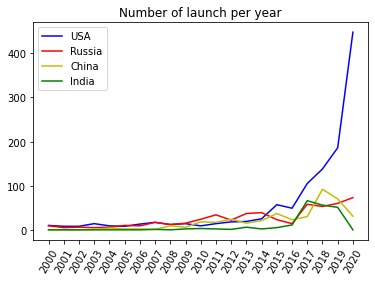

<Figure size 5760x5760 with 0 Axes>

In [224]:
fig = plt.figure()

ax = plt.subplot(111)

ax.plot(data['Date of Launch'], data['nb_launch_USA'], 'b', label = 'USA')
ax.plot(data['Date of Launch'], data['nb_launch_Russia'], 'r', label = 'Russia')
ax.plot(data['Date of Launch'], data['nb_launch_China'], 'y', label = 'China')
ax.plot(data['Date of Launch'], data['nb_launch_India'], 'g', label = 'India')

plt.title('Number of launch per year')
ax.legend()
plt.xticks(rotation=60)
plt.figure(figsize=(80,80))
plt.show()

# Reload dataset to analyse the puropses of launch

In [4]:
df = pd.read_csv('C:/Users/amaur/OneDrive/Documents/Data science/Space prediction project/dataset/launch_2000_2020.csv', sep=';')

In [5]:
df.set_index(['Purpose_agg', 'Date of Launch'], inplace = True)

In [6]:
list_agg_purposes = ['earth_observation_and_surveillance', 'communication_and_positionning',
                     'other', 'increase_mission_performance_and_technology', 'space_science']
list_df = []
i=0
while i<len(list_agg_purposes):
    name =  list_agg_purposes[i]
    replace_name = 'nb_launch_'+name
    name = df.xs(list_agg_purposes[i],level=0)
    name = name.groupby(level=0).count()
    name.rename(columns = {'Unnamed: 0':replace_name}, inplace = True)
    name = name[replace_name]
    name = name.reset_index()
    name['Date of Launch'] = pd.to_datetime(name['Date of Launch'], format='%Y')
    if len(name)<21:
        r = pd.date_range(start=dt.datetime.strptime('2000', '%Y'), end=dt.datetime.strptime('2020', '%Y'))
        name = name.set_index('Date of Launch').reindex(r).fillna(0).rename_axis('Date of Launch').reset_index()
        name['Date of Launch'] = pd.to_datetime(name['Date of Launch']).dt.strftime('%Y')
        name = name.groupby('Date of Launch').sum()
        name = name.reset_index()
        list_df.append(name)
    else:
        name['Date of Launch'] = pd.to_datetime(name['Date of Launch']).dt.strftime('%Y')
        list_df.append(name)
    i=i+1

In [7]:
data = pd.merge(list_df[0],list_df[1])
data = pd.merge(data,list_df[2])
data = pd.merge(data,list_df[3])
data = pd.merge(data,list_df[4])

In [8]:
data.head()

,Date of Launch,nb_launch_earth_observation_and_surveillance,nb_launch_communication_and_positionning,nb_launch_other,nb_launch_increase_mission_performance_and_technology,nb_launch_space_science
0,2000,2,22,0.0,1,4
1,2001,3,12,0.0,2,1
2,2002,3,24,0.0,1,2
3,2003,4,18,0.0,2,3
4,2004,6,17,0.0,2,3


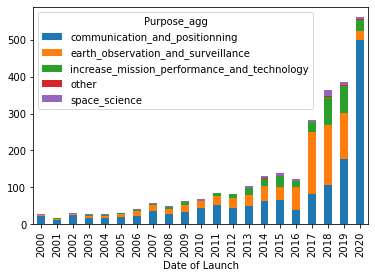

In [9]:
df.groupby(['Date of Launch','Purpose_agg']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

# Generate a dataset per country

In [10]:
df_usa = df[df['Launcher_country']=='USA']
df_china = df[df['Launcher_country']=='China']
df_russia = df[df['Launcher_country']=='Russia']
df_india = df[df['Launcher_country']=='India']

C:\Users\amaur\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\amaur\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\amaur\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\amaur\Anaconda3\lib\site-packages\pandas\plotting\_matpl

Text(0.5, 1.0, 'India')

<Figure size 432x288 with 0 Axes>

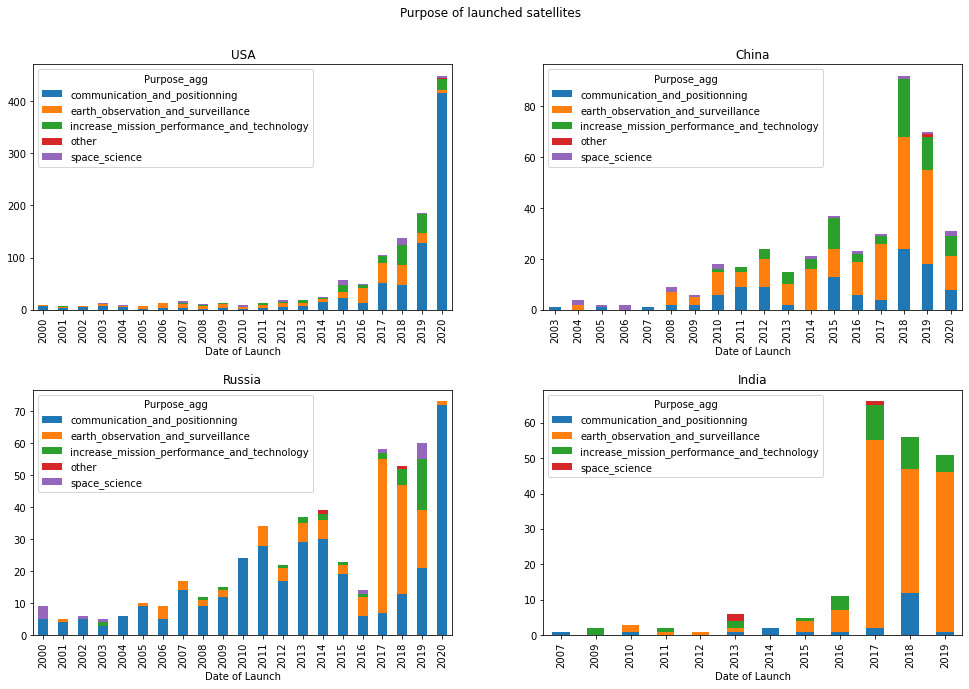

In [11]:
fig = plt.figure()

f, a = plt.subplots(2,2,figsize=(15,10))

f.suptitle('Purpose of launched satellites')

f.tight_layout(pad=6.0)
f.subplots_adjust(top=0.9)

df_usa.groupby(['Date of Launch','Purpose_agg']).size().unstack().plot(kind='bar',ax=a[0,0],stacked=True).set_title('USA')
df_china.groupby(['Date of Launch','Purpose_agg']).size().unstack().plot(kind='bar',ax=a[0,1],stacked=True).set_title('China')
df_russia.groupby(['Date of Launch','Purpose_agg']).size().unstack().plot(kind='bar',ax=a[1,0],stacked=True).set_title('Russia')
df_india.groupby(['Date of Launch','Purpose_agg']).size().unstack().plot(kind='bar',ax=a[1,1],stacked=True).set_title('India')

# Driver of the demand for launch domestic vs foreign

In [12]:
df_usa.reset_index()

,Purpose_agg,Date of Launch,Unnamed: 0,Current Official Name of Satellite,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Launch Mass (kg.),Dry Mass (kg.),Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Vehicle,Comments,Country of Operator/Owner_agg,Country of Contractor_agg,Launcher_country
0,communication_and_positionning,2016,5,ABS-2A,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,1800.0,NaN,15.0,Boeing Satellite Systems,USA,Falcon 9,NaN,Int_coop,USA,USA
1,communication_and_positionning,2015,6,ABS-3A,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,2000.0,NaN,15.0,Boeing Satellite Systems,USA,Falcon 9,Coverage of Americas Europe and Africa.,Int_coop,USA,USA
2,communication_and_positionning,2004,7,ABS-4,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,4143.0,1700,12.0,Space Systems/Loral,USA,Atlas 3,Purchased by ABS in 2013.,Int_coop,USA,USA
3,earth_observation_and_surveillance,2003,11,USA 171,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,4500.0,NaN,NaN,TRW Space and Electronics,USA,Titan IV,Electronic intelligence (ELINT).,USA,USA,USA
4,earth_observation_and_surveillance,2009,12,USA 202,USA,National Reconnaissance Office (NRO),Military,Earth Observation,Electronic Intelligence,GEO,5000.0,NaN,NaN,National Reconnaissance Laboratory (?),USA,Delta 4 Heavy,ELINT.,USA,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,earth_observation_and_surveillance,2009,2641,Worldview 2,USA,Maxar Technologies Inc.,Commercial,Earth Observation,NaN,LEO,2800.0,NaN,NaN,Ball Aerospace,USA,Delta 2,Will provide earth imaging in eight color ban...,USA,USA,USA
1177,earth_observation_and_surveillance,2014,2642,Worldview 3,USA,Maxar Technologies Inc.,Commercial,Earth Observation,NaN,LEO,2800.0,NaN,12.0,Ball Aerospace,USA,Atlas 5,WorldView-3 provides 31 cm panchromatic resolu...,USA,USA,USA
1178,increase_mission_performance_and_technology,2020,2643,USA 299,USA,US Space Force,Military,Technology Development,NaN,LEO,4990.0,NaN,NaN,Boeing Corp.,USA,Atlas 5,Sixth flight of OSB.,USA,USA,USA
1179,earth_observation_and_surveillance,2011,2662,X-Sat,Singapore,Centre for Research in Satellite Technology (C...,Government,Earth Observation,NaN,LEO,91.0,NaN,3.0,Centre for Research in Satellite Technology (C...,Singapore,PSLV C16,Signapore's first national satellite; multi-sp...,ROW,ROW,USA


In [13]:
country_op = df_usa['Country of Operator/Owner_agg'].tolist()
country_launch = df_usa['Launcher_country'].tolist()
domestic_demand = []
i=0
while i<len(country_launch):
    if country_launch[i]==country_op[i]:
        domestic_demand.append(1)
    else:
        domestic_demand.append(0)
    i=i+1
df_usa['Domestic_demand']=domestic_demand

C:\Users\amaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [14]:
df_usa = df_usa.reset_index()

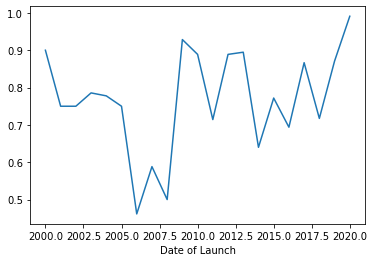

In [16]:
plot = df_usa.groupby('Date of Launch')['Domestic_demand'].mean().plot()
fig = plot.get_figure()
fig.savefig('US_domestic_launch.png')

In [270]:
df_usa_grouped = df_usa.groupby(['Date of Launch']).mean()
nb_launch = data['nb_launch_USA'].tolist()
df_usa_grouped['nb_launch'] = nb_launch
correlation = df_usa_grouped.corr(method="pearson")
correlation

## Domestic demand for china

In [282]:
df_china.reset_index()

,Purpose_agg,Date of Launch,Unnamed: 0,Current Official Name of Satellite,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Launch Mass (kg.),Dry Mass (kg.),Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Vehicle,Comments,Country of Operator/Owner_agg,Country of Contractor_agg,Launcher_country
0,communication_and_positionning,2017,53,Alcomsat,Algeria,Algerian Space Agency (ASAL),Government,Communications,NaN,GEO,5225.0,NaN,15.0,China Academy of Space Technology (CAST),China,Long March 3B,Algeria's first communications satellite.,ROW,China,China
1,communication_and_positionning,2005,98,Apstar 6,China,APT Satellite Holdings Ltd.,Commercial,Communications,NaN,GEO,4680.0,NaN,NaN,Alcatel Space Industries,France/Italy,Long March 3B,Partial power failure in 2018. Apstar 6C has t...,China,EU,China
2,communication_and_positionning,2018,99,Apstar 6C,China,APT Satellite Holdings Ltd.,Commercial,Communications,NaN,GEO,NaN,NaN,15.0,China Academy of Space Technology (CAST),China,Long March 3B,"45 C-band, Ku-band and Ka-band transponders, A...",China,China,China
3,communication_and_positionning,2020,100,Apstar 6D,China,APT Satellite Holdings Ltd.,Commercial,Communications,NaN,GEO,5550.0,NaN,15.0,China Academy of Space Technology (CAST),China,Long March 3B,Will use a conventional liquid-fueled engine t...,China,China,China
4,communication_and_positionning,2012,101,Apstar 7,China,APT Satellite Holdings Ltd.,Commercial,Communications,NaN,GEO,5054.0,NaN,15.0,Thales Alenia Space,France/Italy,Long March 3B,Replacement for Apstar 2R.,China,EU,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,earth_observation_and_surveillance,2011,2782,Ziyuan 1-02C,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,1500.0,NaN,NaN,China Academy of Space Technology (CAST),China,Long March 4B,Can acquire high-resolution data through remot...,China,China,China
399,earth_observation_and_surveillance,2019,2783,Ziyuan 1-2D,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,2650.0,NaN,5.0,China Academy of Space Technology (CAST),China,Long March 4B,Hyperspectral imaging,China,China,China
400,earth_observation_and_surveillance,2012,2784,Ziyuan 3,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,2650.0,NaN,4.0,China Academy of Space Technology (CAST),China,Long March 4B,Land survey satellite.,China,China,China
401,earth_observation_and_surveillance,2016,2785,Ziyuan 3-2,China,China Centre for Resources Satellite Data and ...,Government,Earth Observation,NaN,LEO,2630.0,NaN,4.0,China Academy of Space Technology (CAST),China,Long March 4B,Thought to be for intelligence gathering.,China,China,China


In [283]:
country_op = df_china['Country of Operator/Owner_agg'].tolist()
country_launch = df_china['Launcher_country'].tolist()
domestic_demand = []
i=0
while i<len(country_launch):
    if country_launch[i]==country_op[i]:
        domestic_demand.append(1)
    else:
        domestic_demand.append(0)
    i=i+1
df_china['Domestic_demand']=domestic_demand

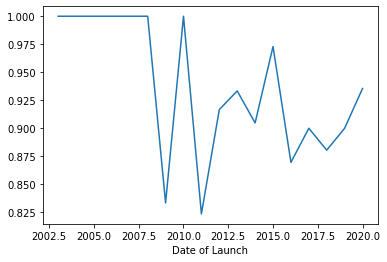

In [284]:
df_china = df_china.reset_index()
df_china.groupby('Date of Launch')['Domestic_demand'].mean().plot()